In [8]:
import sys
import os
import matplotlib.pyplot as plt 
from tensorflow import keras

# Add the parent directory of /notebooks to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [9]:
# Import the components from your new package
from src.agent.dqn_agent import DQNAgent
from src.agent.double_dqn_agent import DoubleDQNAgent
from src.env.env import CustomBlackjackEnv

In [10]:
import logging
# --- Configure logging at the very beginning of your main script ---
# This sets up a basic console handler for all loggers
# You can adjust the level here, e.g., logging.INFO or logging.DEBUG
logging.basicConfig(level=logging.INFO, format='%(message)s')

In [ ]:
from src.utils.helpers import set_global_seeds, smooth

RANDOM_SEED = 18 # Or 25, or any other integer
set_global_seeds(RANDOM_SEED)

Global seeds set to 18


In [12]:
# Initialize the custom Blackjack environment
env = CustomBlackjackEnv()

# Observation and action space descriptions
print(f"Observation space: {env.observation_description}")
print(f"Action space: {env.action_description}")

# Dynamically derive state size and number of actions from env config
state_size = env.state_size
num_actions = env.num_actions
num_decks = env.num_decks
print(f"Derived state size: {state_size}, number of actions: {num_actions}")

Observation space: (player_current_sum, dealer_card_showing, usable_ace)
Action space: 0: Stand, 1: Hit
Derived state size: 3, number of actions: 2


In [13]:
# Define basic training parameters for the .fit method
training_params = {
    "num_episodes": 10000, # Number of games the model is trained for 
    "batch_size": 32, # Number of games in a mini-batch
    "log_interval": 1000 # How often the model evaluates it's performance
}

In [14]:
print("--- Training DQN Agent ---")

# Initialize with environment parameters
dqn_agent = DQNAgent(env)

# Start training
dqn_rewards_history = dqn_agent.fit(env, **training_params) # Pass basic params using **kwargs

Starting DQN training for 10000 episodes...


--- Training DQN Agent ---


Batch 1/10: 100%|██████████| 1000/1000 [00:05<00:00, 188.92 episode/s, AvgR=-0.20, Eps=0.010, Buf=1112, Steps/Int=1112]
Episode Batch 1000/10000, Avg Reward (last 1000): -0.2050
Batch 2/10: 100%|██████████| 1000/1000 [00:05<00:00, 160.18 episode/s, AvgR=-0.09, Eps=0.010, Buf=2420, Steps/Int=1308]
Episode Batch 2000/10000, Avg Reward (last 1000): -0.0935
Batch 3/10: 100%|██████████| 1000/1000 [00:05<00:00, 168.24 episode/s, AvgR=-0.13, Eps=0.010, Buf=3787, Steps/Int=1367]
Episode Batch 3000/10000, Avg Reward (last 1000): -0.1335
Batch 4/10: 100%|██████████| 1000/1000 [00:06<00:00, 152.35 episode/s, AvgR=-0.07, Eps=0.010, Buf=5242, Steps/Int=1455]
Episode Batch 4000/10000, Avg Reward (last 1000): -0.0660
Batch 5/10: 100%|██████████| 1000/1000 [00:06<00:00, 145.17 episode/s, AvgR=-0.03, Eps=0.010, Buf=6746, Steps/Int=1504]
Episode Batch 5000/10000, Avg Reward (last 1000): -0.0345
Batch 6/10: 100%|██████████| 1000/1000 [00:06<00:00, 158.81 episode/s, AvgR=-0.03, Eps=0.010, Buf=8223, Steps/

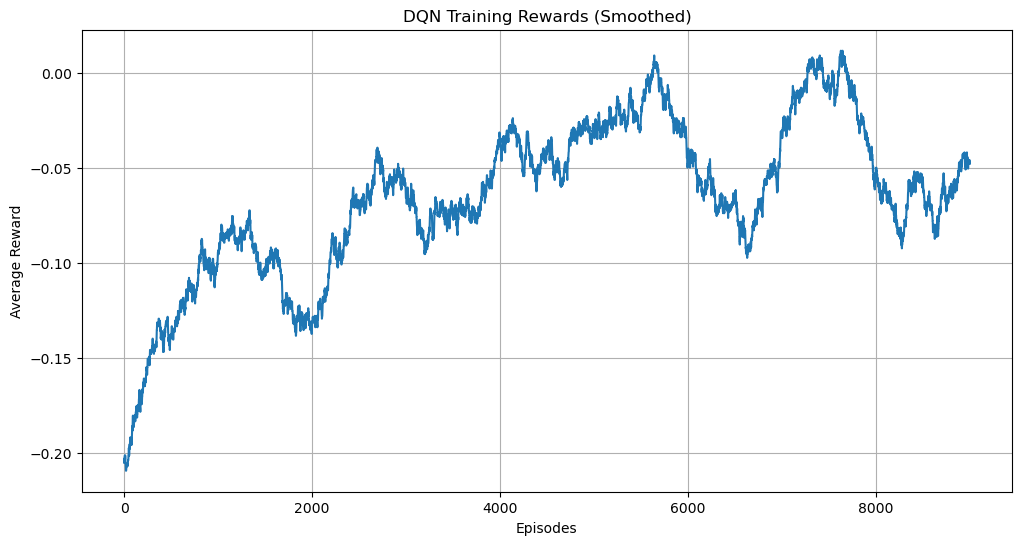

In [15]:
# Plotting the smoothed rewards
plt.figure(figsize=(12, 6))
plt.plot(smooth(dqn_rewards_history, w=1000)) # Use a smoothing window, e.g., 1000 episodes
plt.title("DQN Training Rewards (Smoothed)")
plt.xlabel("Episodes")
plt.ylabel("Average Reward")
plt.grid(True)
plt.show()

In [16]:
print("\n--- Evaluating DQN Agent ---")
dqn_eval = dqn_agent.evaluate(env, num_eval_episodes=5000)

Starting evaluation for 5000 episodes...



--- Evaluating DQN Agent ---


DQN Evaluation: 100%|██████████| 5000/5000 [00:23<00:00, 210.52episode/s, AvgR=-0.00]

--- Evaluation Results ---
Total Episodes: 5000
Average Reward: -0.0046
--------------------------


In [17]:
print("\n--- Training Double DQN Agent ---")

double_dqn_agent = DoubleDQNAgent(env)

# You can reuse training_params or define new ones
double_dqn_rewards_history = double_dqn_agent.fit(env, **training_params)

Double DQN initialized.
Starting Double DQN training for 10000 episodes...



--- Training Double DQN Agent ---


Batch 1/10: 100%|██████████| 1000/1000 [00:06<00:00, 171.76 episode/s, AvgR=-0.11, Eps=0.010, Buf=1265, Steps/Int=1265]
Episode Batch 1000/10000, Avg Reward (last 1000): -0.1105
Batch 2/10: 100%|██████████| 1000/1000 [00:05<00:00, 163.84 episode/s, AvgR=-0.02, Eps=0.010, Buf=2644, Steps/Int=1379]
Episode Batch 2000/10000, Avg Reward (last 1000): -0.0245
Batch 3/10: 100%|██████████| 1000/1000 [00:06<00:00, 160.24 episode/s, AvgR=-0.04, Eps=0.010, Buf=4096, Steps/Int=1452]
Episode Batch 3000/10000, Avg Reward (last 1000): -0.0350
Batch 4/10: 100%|██████████| 1000/1000 [00:06<00:00, 152.10 episode/s, AvgR=0.01, Eps=0.010, Buf=5599, Steps/Int=1503] 
Episode Batch 4000/10000, Avg Reward (last 1000): 0.0085
Batch 5/10: 100%|██████████| 1000/1000 [00:06<00:00, 160.90 episode/s, AvgR=-0.02, Eps=0.010, Buf=7085, Steps/Int=1486]
Episode Batch 5000/10000, Avg Reward (last 1000): -0.0185
Batch 6/10: 100%|██████████| 1000/1000 [00:06<00:00, 134.09 episode/s, AvgR=-0.04, Eps=0.010, Buf=8650, Steps/I

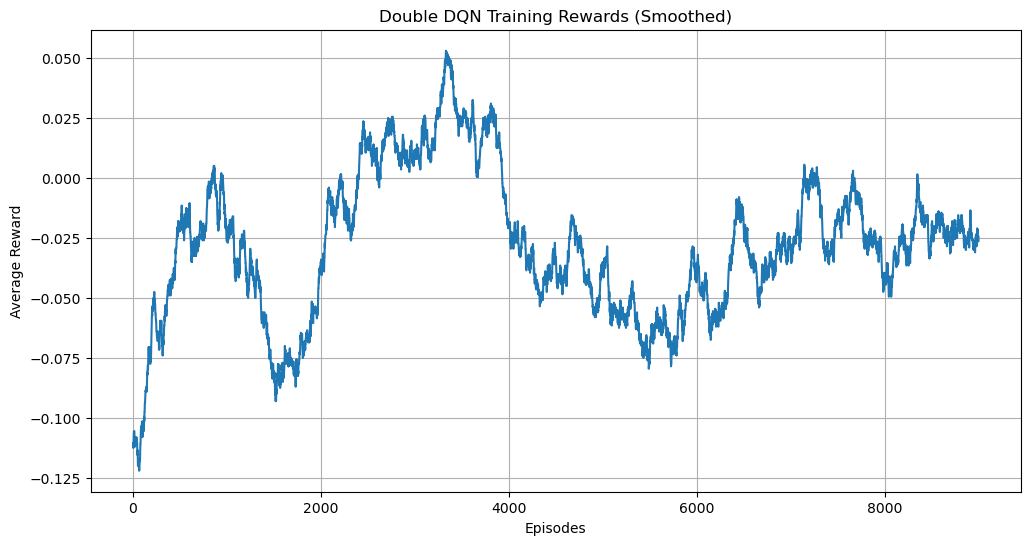

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(smooth(double_dqn_rewards_history, w=1000))
plt.title("Double DQN Training Rewards (Smoothed)")
plt.xlabel("Episodes")
plt.ylabel("Average Reward")
plt.grid(True)
plt.show()

In [19]:
print("\n--- Evaluating Double DQN Agent ---")
ddqn_eval = double_dqn_agent.evaluate(env, num_eval_episodes=5000)

Starting evaluation for 5000 episodes...



--- Evaluating Double DQN Agent ---


Double DQN Evaluation: 100%|██████████| 5000/5000 [00:23<00:00, 210.99episode/s, AvgR=-0.03]

--- Evaluation Results ---
Total Episodes: 5000
Average Reward: -0.0319
--------------------------
